<a href="https://colab.research.google.com/github/soumya-beginner92/First_project/blob/main/quara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import tensorflow as tf
import tensorflow_hub as hub
#tf.compat.v1.disable_eager_execution()
#from sentence_transformers import SentenceTransformer
from sentence_transformers import SentenceTransformer
import time
from keras.models import Sequential
from keras.layers import Dense
#create model
model = Sequential()

In [ ]:
#common functions
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

In [ ]:
# load the data
full_df = pd.read_csv('train.csv')

In [ ]:
full_df.head(10)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0.0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0.0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0.0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0.0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0.0
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0.0
6,00005059a06ee19e11ad,Why does Quora automatically ban conservative ...,0.0
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off...,0.0
8,00005bd3426b2d0c8305,"Is there such a thing as dressing moderately, ...",0.0
9,00006e6928c5df60eacb,Is it just me or have you ever been in this ph...,0.0


In [ ]:
full_df.target.unique()

array([ 0.,  1., nan])

<Axes: xlabel='target'>

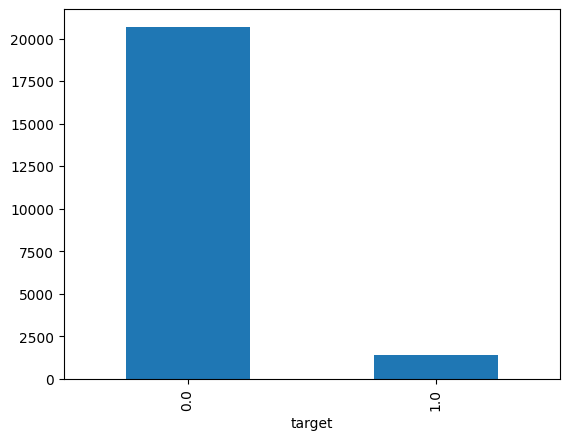

In [ ]:
#there is big class imbalance so lets apply class balancing technique
full_df['target'].value_counts().plot.bar()

In [ ]:
class_count_0, class_count_1 = full_df['target'].value_counts()

# Separate class
class_0 = full_df[full_df['target'] == 0]
class_1 = full_df[full_df['target'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (20696, 3)
class 1: (1368, 3)


total class of 1 and0: target
0.0    1368
1.0    1368
Name: count, dtype: int64


<Axes: title={'center': 'count (target)'}, xlabel='target'>

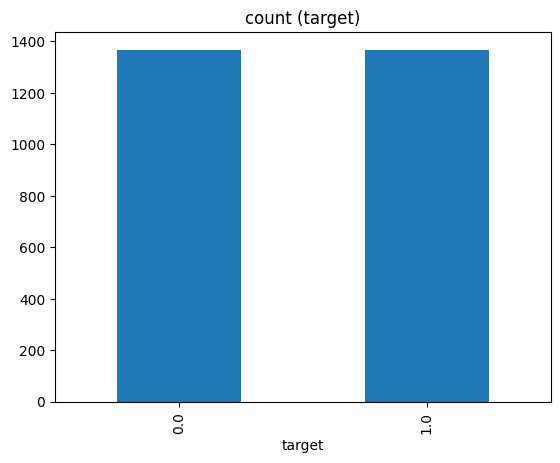

In [ ]:
#code for under sampling
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['target'].value_counts())# plot the count after under-sampeling
test_under['target'].value_counts().plot(kind='bar', title='count (target)')

In [ ]:
# #plot the count after over-sampling

# class_1_over = class_1.sample(class_count_0, replace=True)

# test_over = pd.concat([class_1_over, class_0], axis=0)

# print("total class of 1 and 0:",test_over['target'].value_counts())
# test_over['target'].value_counts().plot(kind='bar', title='count (target)')

In [ ]:
# split test train with 70 percentage training data and 30 percent test data

X_train, X_test, y_train, y_test = train_test_split(test_under['question_text'], test_under['target'],
                                   random_state=104,
                                   test_size=0.25,
                                   shuffle=True)

print('Stats for Target for Training Data \n {}'.format(y_train.value_counts()))
print('Stats for Target for Test Data \n {}'.format(y_test.value_counts()))

Stats for Target for Training Data 
 target
1.0    1041
0.0    1011
Name: count, dtype: int64
Stats for Target for Test Data 
 target
0.0    357
1.0    327
Name: count, dtype: int64


In [ ]:
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
#sample_count = 60000

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
start_time = time.time()
sentence_embeddings = sbert_model.encode(X_train.to_list())
#X_train.to_list()
#sbert_model.encode(['This is a test','only for testing purpose','Dog is an animal'])
print(time.time() - start_time)

5.097311496734619


In [ ]:
sentence_embeddings

array([[ 0.11108998,  0.3146093 ,  0.6938086 , ..., -0.29280677,
        -0.15900154, -0.06810599],
       [ 0.13731189,  0.9194061 ,  0.7300898 , ..., -0.21689302,
         0.26310715,  0.4172828 ],
       [-0.20070507,  1.093163  ,  0.6770396 , ..., -0.10320871,
        -0.693504  ,  0.3166068 ],
       ...,
       [ 0.06491954,  0.8070631 ,  1.022162  , ..., -0.815361  ,
        -0.40467915,  0.00291992],
       [-0.18711227,  0.51448834,  0.9212783 , ...,  0.4118487 ,
        -0.02851655,  0.7090661 ],
       [ 0.5009132 , -0.18541649,  0.57228273, ..., -0.3156285 ,
         0.26657188,  0.3160232 ]], dtype=float32)

In [ ]:
from tensorflow.keras.optimizers import SGD
#create model

model = Sequential()


#add model layers
model.add(Dense(400, activation='relu', input_shape=(768,)))
model.add(Dense(400, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy',metrics=['categorical_accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)
#train model
model.fit(sentence_embeddings, y_train, epochs=50, batch_size=20)

Epoch 1/50
103/103 [==============================] - 3s 5ms/step - loss: 0.3845 - categorical_accuracy: 1.0000
Epoch 2/50
103/103 [==============================] - 1s 5ms/step - loss: 0.2837 - categorical_accuracy: 1.0000
Epoch 3/50
103/103 [==============================] - 0s 4ms/step - loss: 0.2369 - categorical_accuracy: 1.0000
Epoch 4/50
103/103 [==============================] - 1s 5ms/step - loss: 0.2044 - categorical_accuracy: 1.0000
Epoch 5/50
103/103 [==============================] - 1s 5ms/step - loss: 0.1628 - categorical_accuracy: 1.0000
Epoch 6/50
103/103 [==============================] - 0s 3ms/step - loss: 0.1293 - categorical_accuracy: 1.0000
Epoch 7/50
103/103 [==============================] - 0s 4ms/step - loss: 0.0922 - categorical_accuracy: 1.0000
Epoch 8/50
103/103 [==============================] - 0s 3ms/step - loss: 0.0550 - categorical_accuracy: 1.0000
Epoch 9/50
103/103 [==============================] - 0s 3ms/step - loss: 0.0337 - categorical_accuracy:

In [ ]:
y_train.unique()

array([0., 1.])

In [ ]:
start_time = time.time()
sentence_embeddings_test = sbert_model.encode(X_test.to_list())
#X_train.to_list()
#sbert_model.encode(['This is a test','only for testing purpose','Dog is an animal'])
print(time.time() - start_time)

1.1820478439331055


In [ ]:
from sklearn.metrics import confusion_matrix,roc_auc_score,f1_score
y_pred=model.predict(sentence_embeddings_test)

cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

22/22 [==============================] - 0s 2ms/step
Confusion matrix
[[297  60]
 [ 42 285]]


In [ ]:
score = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.9216


In [ ]:
f1_score(y_test, y_pred.round())

0.8482142857142858